In [11]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer as si
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [29]:
data = pd.read_csv('datasets_595677_1071811_Student.csv')

In [34]:
data.head()

,Maths,Physics,Chemistry,Result
0,17,27,22,0
1,72,82,77,1
2,97,18,13,0
3,8,42,37,0
4,32,25,20,0


In [19]:
imr = SimpleImputer()

In [31]:
imr.fit(data.values)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [33]:
imp = imr.transform(data.values)
imp

array([[17., 27., 22.,  0.],
       [72., 82., 77.,  1.],
       [97., 18., 13.,  0.],
       ...,
       [90., 64., 43.,  1.],
       [67., 41.,  6.,  0.],
       [92., 74.,  9.,  0.]])

In [35]:
data.fillna(data.mean())

,Maths,Physics,Chemistry,Result
0,17,27,22,0
1,72,82,77,1
2,97,18,13,0
3,8,42,37,0
4,32,25,20,0
...,...,...,...,...
995,4,48,64,0
996,63,22,88,0
997,90,64,43,1
998,67,41,6,0


In [38]:
data = pd.DataFrame(imp,columns =['Maths','Physics','Chemistry','Result'])

In [40]:
data = pd.read_csv('datasets_761595_1314449_msft.csv')

In [54]:
data['Category']

0                 Books
1                 Books
2                 Books
3                 Books
4                 Books
             ...       
5316    Developer Tools
5317    Developer Tools
5318    Developer Tools
5319    Developer Tools
5320    Developer Tools
Name: Category, Length: 5321, dtype: object

In [44]:
data.drop('Date',axis=1,inplace=True)

In [47]:
data.dropna(inplace=True)

In [56]:
mapping = {'Books':1,
           'Developer Tools':2}

In [57]:
data['Category'] = data['Category'].map(mapping)

In [62]:
data['Category'].values

array([1., 1., 1., ..., 2., 2., 2.])

In [65]:
data

,Name,Rating,No of people Rated,Category,Price
0,Dynamic Reader,3.5,268,1.0,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,1.0,Free
2,BookViewer,3.5,593,1.0,Free
3,Brick Instructions,3.5,684,1.0,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,1.0,Free
...,...,...,...,...,...
5316,Get Color,3.0,785,2.0,₹ 54.50
5317,JS King,1.0,720,2.0,₹ 269.00
5318,MQTTSniffer,2.5,500,2.0,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,2.0,₹ 269.00


In [66]:
da = np.array(data['Category'])

In [69]:
da = da.reshape(-1,1)

In [73]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(data['Price']))}

In [74]:
class_mapping

{'Free': 0,
 '₹ 1,099.00': 1,
 '₹ 1,149.00': 2,
 '₹ 1,349.00': 3,
 '₹ 1,521.80': 4,
 '₹ 1,624.00': 5,
 '₹ 1,899.00': 6,
 '₹ 109.00': 7,
 '₹ 114.00': 8,
 '₹ 119.00': 9,
 '₹ 134.00': 10,
 '₹ 139.00': 11,
 '₹ 144.00': 12,
 '₹ 154.00': 13,
 '₹ 164.00': 14,
 '₹ 189.00': 15,
 '₹ 194.00': 16,
 '₹ 2,149.00': 17,
 '₹ 2,599.00': 18,
 '₹ 209.00': 19,
 '₹ 219.00': 20,
 '₹ 269.00': 21,
 '₹ 279.00': 22,
 '₹ 299.00': 23,
 '₹ 319.00': 24,
 '₹ 324.00': 25,
 '₹ 329.40': 26,
 '₹ 434.00': 27,
 '₹ 489.00': 28,
 '₹ 5,449.00': 29,
 '₹ 54.00': 30,
 '₹ 54.50': 31,
 '₹ 549.00': 32,
 '₹ 574.00': 33,
 '₹ 59.00': 34,
 '₹ 624.00': 35,
 '₹ 64.00': 36,
 '₹ 69.00': 37,
 '₹ 699.00': 38,
 '₹ 79.00': 39,
 '₹ 824.00': 40,
 '₹ 89.50': 41,
 '₹ 94.00': 42,
 '₹ 99.00': 43}

In [75]:
data['Price'] = data['Price'].map(class_mapping)

In [76]:
data.head()

,Name,Rating,No of people Rated,Category,Price
0,Dynamic Reader,3.5,268,1.0,0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,1.0,0
2,BookViewer,3.5,593,1.0,0
3,Brick Instructions,3.5,684,1.0,0
4,Introduction to Python Programming by GoLearni...,2.0,634,1.0,0


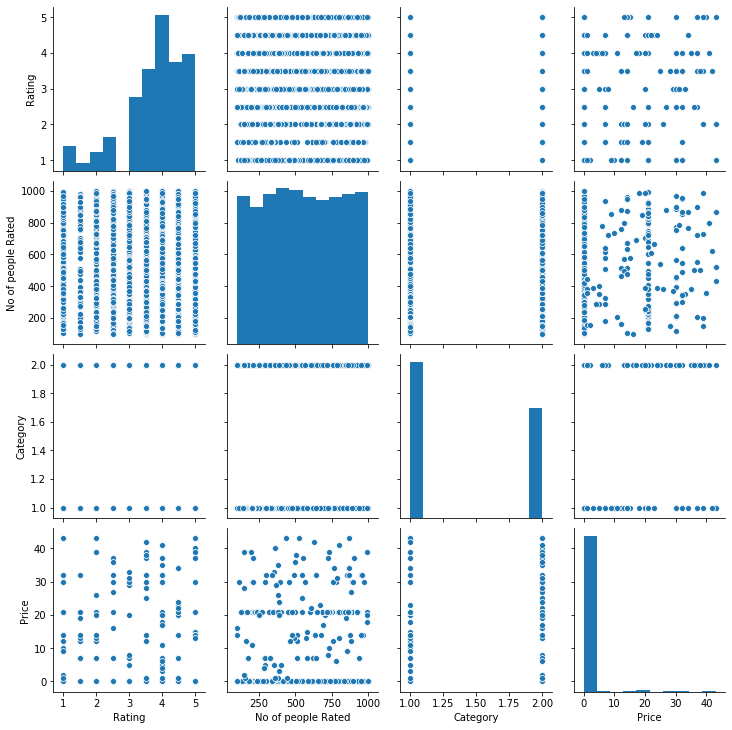

In [78]:
sns.pairplot(data)

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
l = LabelEncoder()

In [82]:
y = l.fit_transform(data['Category'].values)

In [83]:
l.inverse_transform(y)

array([1., 1., 1., ..., 2., 2., 2.])

In [84]:
data 

,Name,Rating,No of people Rated,Category,Price
0,Dynamic Reader,3.5,268,1.0,0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,1.0,0
2,BookViewer,3.5,593,1.0,0
3,Brick Instructions,3.5,684,1.0,0
4,Introduction to Python Programming by GoLearni...,2.0,634,1.0,0
...,...,...,...,...,...
5316,Get Color,3.0,785,2.0,31
5317,JS King,1.0,720,2.0,21
5318,MQTTSniffer,2.5,500,2.0,36
5319,"Dev Utils - JSON, CSV and XML",4.0,862,2.0,21


In [89]:
X = data[['Rating','No of people Rated','Category','Price']].values

In [99]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
one.fit_transform(X[:,0].reshape(-1,1)).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [22]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs,zs))

In [23]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise

In [29]:
targets.shape

(1000, 1)

In [32]:
init_range = 0.1 
weight = np.random.uniform(-init_range,init_range,size=(2,1))
bias = np.random.uniform(-init_range,init_range,size=1)

In [49]:
datas = pd.read_csv('datasets_494766_1368516_country_wise_latest.csv')

In [53]:
datas.head(6)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,35981,1225,24602,10154,53,14,52,3.40,68.37,4.98,35229,752,2.13,Eastern Mediterranean
1,Albania,4570,128,2608,1834,104,5,85,2.80,57.07,4.91,3906,664,17.00,Europe
2,Algeria,26159,1136,17369,7654,675,12,0,4.34,66.40,6.54,21948,4211,19.19,Africa
3,Andorra,897,52,803,42,8,0,0,5.80,89.52,6.48,880,17,1.93,Europe
4,Angola,880,35,241,604,29,2,5,3.98,27.39,14.52,638,242,37.93,Africa
5,Antigua and Barbuda,82,3,60,19,6,0,2,3.66,73.17,5.00,76,6,7.89,Americas


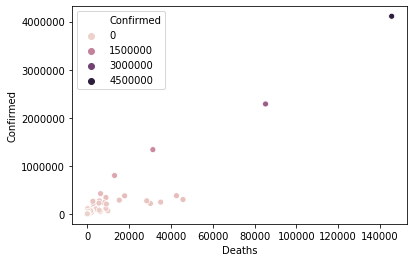

In [55]:
sns.scatterplot(data=datas,x=datas['Deaths'],y=datas['Confirmed'],hue=datas['Confirmed'])

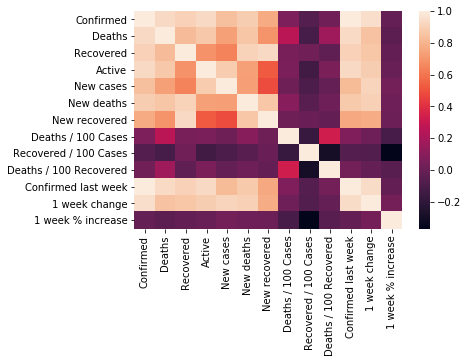

In [68]:
sns.heatmap(datas.corr())

In [69]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(datas['Country/Region']))}

In [71]:
datas['Country/Region'] = datas['Country/Region'].map(class_mapping)

In [73]:
datas.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,35981,1225,24602,10154,53,14,52,3.40,68.37,4.98,35229,752,2.13,Eastern Mediterranean
1,1,4570,128,2608,1834,104,5,85,2.80,57.07,4.91,3906,664,17.00,Europe
2,2,26159,1136,17369,7654,675,12,0,4.34,66.40,6.54,21948,4211,19.19,Africa
3,3,897,52,803,42,8,0,0,5.80,89.52,6.48,880,17,1.93,Europe
4,4,880,35,241,604,29,2,5,3.98,27.39,14.52,638,242,37.93,Africa


In [110]:
sets = pd.read_csv('datasets_494766_1368516_worldometer_data.csv')

In [125]:
sets

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311293e+08,4248327,NaN,148490.0,NaN,2028074.0,NaN,2071763.0,19098.0,12830.0,448.0,52520426.0,158610.0,Americas
1,Brazil,South America,2.126571e+08,2348200,NaN,85385.0,NaN,1592281.0,NaN,670534.0,8318.0,11042.0,402.0,4911063.0,23094.0,Americas
2,India,Asia,1.380863e+09,1337022,NaN,31406.0,NaN,850107.0,NaN,455509.0,8944.0,968.0,23.0,15849068.0,11478.0,South-EastAsia
3,Russia,Europe,1.459387e+08,800849,NaN,13046.0,NaN,588774.0,NaN,199029.0,2300.0,5488.0,89.0,26300652.0,180217.0,Europe
4,South Africa,Africa,5.935501e+07,421996,NaN,6343.0,NaN,245771.0,NaN,169882.0,539.0,7110.0,107.0,2684488.0,45228.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Greenland,North America,5.677700e+04,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,229.0,NaN,5645.0,99424.0,Europe
205,Montserrat,North America,4.992000e+03,12,NaN,1.0,NaN,10.0,NaN,1.0,NaN,2404.0,200.0,61.0,12220.0,NaN
206,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
207,Caribbean Netherlands,North America,2.623800e+04,11,NaN,NaN,NaN,7.0,NaN,4.0,NaN,419.0,NaN,424.0,16160.0,NaN


In [120]:
sets.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            195
TotalDeaths          24
NewDeaths           201
TotalRecovered        4
NewRecovered        198
ActiveCases           4
Serious,Critical     82
Tot Cases/1M pop      1
Deaths/1M pop        25
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [124]:
sets.dropna(axis=0)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
5,Mexico,North America,129018075.0,378285,7573.0,42645.0,737.0,242692.0,6483.0,92948.0,3889.0,2932.0,331.0,896124.0,6946.0,Americas
11,Pakistan,Asia,221143253.0,271887,1487.0,5787.0,24.0,236596.0,16813.0,29504.0,1294.0,1229.0,26.0,1844926.0,8343.0,EasternMediterranean
31,Bolivia,South America,11682802.0,66456,1204.0,2473.0,66.0,20614.0,584.0,43369.0,71.0,5688.0,212.0,144045.0,12330.0,Americas
32,Belgium,Europe,11592951.0,65199,352.0,9817.0,5.0,17394.0,25.0,37988.0,41.0,5624.0,847.0,1514046.0,130601.0,Europe
47,Honduras,North America,9914104.0,37559,657.0,1061.0,50.0,4607.0,159.0,31891.0,51.0,3788.0,107.0,93526.0,9434.0,Americas


In [130]:
sets.dropna(subset=['NewCases','NewDeaths'])

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
5,Mexico,North America,129018075.0,378285,7573.0,42645.0,737.0,242692.0,6483.0,92948.0,3889.0,2932.0,331.0,896124.0,6946.0,Americas
11,Pakistan,Asia,221143253.0,271887,1487.0,5787.0,24.0,236596.0,16813.0,29504.0,1294.0,1229.0,26.0,1844926.0,8343.0,EasternMediterranean
31,Bolivia,South America,11682802.0,66456,1204.0,2473.0,66.0,20614.0,584.0,43369.0,71.0,5688.0,212.0,144045.0,12330.0,Americas
32,Belgium,Europe,11592951.0,65199,352.0,9817.0,5.0,17394.0,25.0,37988.0,41.0,5624.0,847.0,1514046.0,130601.0,Europe
47,Honduras,North America,9914104.0,37559,657.0,1061.0,50.0,4607.0,159.0,31891.0,51.0,3788.0,107.0,93526.0,9434.0,Americas
60,Uzbekistan,Asia,33498791.0,19653,293.0,107.0,1.0,10472.0,NaN,9074.0,138.0,587.0,3.0,1377915.0,41133.0,Europe
69,Australia,Australia/Oceania,25518359.0,13948,353.0,145.0,6.0,8929.0,NaN,4874.0,46.0,547.0,6.0,3854223.0,151037.0,WesternPacific
85,Haiti,North America,11411167.0,7260,63.0,156.0,2.0,4236.0,NaN,2868.0,NaN,636.0,14.0,16649.0,1459.0,Americas


In [135]:
sets.fillna(sets.mean())

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311293e+08,4248327,989.357143,148490.0,111.375,2028074.0,2353.727273,2071763.0,19098.000000,12830.0,448.000000,5.252043e+07,158610.000000,Americas
1,Brazil,South America,2.126571e+08,2348200,989.357143,85385.0,111.375,1592281.0,2353.727273,670534.0,8318.000000,11042.0,402.000000,4.911063e+06,23094.000000,Americas
2,India,Asia,1.380863e+09,1337022,989.357143,31406.0,111.375,850107.0,2353.727273,455509.0,8944.000000,968.0,23.000000,1.584907e+07,11478.000000,South-EastAsia
3,Russia,Europe,1.459387e+08,800849,989.357143,13046.0,111.375,588774.0,2353.727273,199029.0,2300.000000,5488.0,89.000000,2.630065e+07,180217.000000,Europe
4,South Africa,Africa,5.935501e+07,421996,989.357143,6343.0,111.375,245771.0,2353.727273,169882.0,539.000000,7110.0,107.000000,2.684488e+06,45228.000000,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Greenland,North America,5.677700e+04,13,989.357143,3449.4,111.375,13.0,2353.727273,0.0,521.708661,229.0,92.034783,5.645000e+03,99424.000000,Europe
205,Montserrat,North America,4.992000e+03,12,989.357143,1.0,111.375,10.0,2353.727273,1.0,521.708661,2404.0,200.000000,6.100000e+01,12220.000000,NaN
206,Vatican City,Europe,8.010000e+02,12,989.357143,3449.4,111.375,12.0,2353.727273,0.0,521.708661,14981.0,92.034783,1.144692e+06,71273.712042,Europe
207,Caribbean Netherlands,North America,2.623800e+04,11,989.357143,3449.4,111.375,7.0,2353.727273,4.0,521.708661,419.0,92.034783,4.240000e+02,16160.000000,NaN


In [136]:
t = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [141]:
t.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


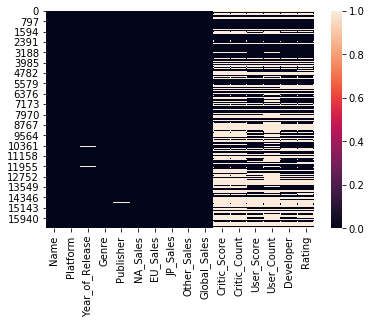

In [138]:
sns.heatmap(t.isnull())

In [139]:
t.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [143]:
t.dropna(axis=0,inplace = True)

In [145]:
t.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [155]:
t_ray =   t['Platform'].values

In [165]:
class_map = {k : i for i,k in enumerate(np.unique(t['Platform']))}

In [170]:
t['Platform'] = t['Platform'].map(class_map)

In [178]:
t.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,771,E
2,Mario Kart Wii,12,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,771,E
3,Wii Sports Resort,12,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,771,E
6,New Super Mario Bros.,2,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,771,E
7,Wii Play,12,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,771,E


In [174]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   int64  
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 906.4+ KB


In [176]:
mape = {le : o for o,le in enumerate(np.unique(t['Developer']))}

In [177]:
t['Developer'] = t['Developer'].map(mape)

In [192]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [181]:
le = LabelEncoder()

In [183]:
y = le.fit_transform(t['Rating'].values)

In [193]:
h = OneHotEncoder()

In [196]:
X = t.drop('Name',axis=1).values

In [198]:
h.fit_transform(X).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [200]:
t_dummy = pd.get_dummies(t)

In [1]:
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [5]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])